# Decision Tree Assignment

We first import the libraries we are going to use. 
monkdata package consists the three MONK databases.
dtree package contains the required algorithms for building a decision tree.

In [1]:
import monkdata as m
import dtree as d
import drawtree_qt5 as qt5
import random
from prettytable import PrettyTable
import numpy as np
import matplotlib.pyplot as plt

# Assignment_0: Which of the three databases is the most difficult for a decision tree algorithm to learn?

# Assignment_1: Calculate the entropy of the TRAINING datasets.

(Note: Entropy is being used in order to define which is the best "question" - attribute - to choose from, to split the input data into subsets. For that reason, we have to run the entropy algorithm on the training set, not the test set)

In [2]:
# Calculate the entropy of each monk dataset
entropy_table = PrettyTable(['Dataset', 'Entropy'])
                          
monk1_entropy = d.entropy(m.monk1)
row1 = ['MONK1', monk1_entropy]
entropy_table.add_row(row1)

monk2_entropy = d.entropy(m.monk2)
row2 = ['MONK2', monk2_entropy]
entropy_table.add_row(row2)

monk3_entropy = d.entropy(m.monk3)
row3 = ['MONK3', monk3_entropy]
entropy_table.add_row(row3)

print(entropy_table)
print()

+---------+--------------------+
| Dataset |      Entropy       |
+---------+--------------------+
|  MONK1  |        1.0         |
|  MONK2  | 0.957117428264771  |
|  MONK3  | 0.9998061328047111 |
+---------+--------------------+



# Assignment_2a: Explain entropy for a uniform distribution and a non-uniform distribution.

Entropy describes the uncertainty of a problem. A problem with high entropy means that its result is more difficult to predict, whereas a low entropy problem is more predictable. 

A uniform distribution (outcomes are equally probable) has the same probability of resulting to each and any of the possible solutions, making it logarithmically unpredictable. This can be also confirmed by the mathematical equation that describes entropy.
On the other hand, a non-uniform ditribution (one of the values is more probable to occur than the others) has higher probability for some of its solutions to be the result, making it more predictable, and thus lower entropy.

# Assignment_2b: Present some example distributions with high and low entropy.

An example of this, is the comparison of a normal with a fake dice. The normal dice has the same probability of resulting in any of its 6 faces, making it unpredictable, thus high entropy. The fake dice has higher probability of resulting in the fake face, as opposed to the other faces, making it more predictable and thus its has a lower entropy than the normal dice.

# Assignment_3: Calculate the expected information gain corresponding to each of the six attributes.

In [3]:
infGain_monk1 = []
infGain_monk2 = []
infGain_monk3 = []
infGain_table = PrettyTable(['Dataset', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6'])

# Calculate the information gain of each attribute, for each monk dataset
for i in range(len(m.attributes)):
    infGain_monk1.append(d.averageGain(m.monk1, m.attributes[i]))
    
    infGain_monk2.append(d.averageGain(m.monk2, m.attributes[i]))
    
    infGain_monk3.append(d.averageGain(m.monk3, m.attributes[i]))

row1 = ['MONK1']
row1.extend(infGain_monk1)
infGain_table.add_row(row1)

row2 = ['MONK2']
row2.extend(infGain_monk2)
infGain_table.add_row(row2)

row3 = ['MONK3']
row3.extend(infGain_monk3)
infGain_table.add_row(row3)
print(infGain_table)
print ()

+---------+-----------------------+-----------------------+-----------------------+----------------------+---------------------+-----------------------+
| Dataset |           a1          |           a2          |           a3          |          a4          |          a5         |           a6          |
+---------+-----------------------+-----------------------+-----------------------+----------------------+---------------------+-----------------------+
|  MONK1  |  0.07527255560831925  |  0.005838429962909286 |  0.00470756661729721  | 0.02631169650768228  | 0.28703074971578435 | 0.0007578557158638421 |
|  MONK2  | 0.0037561773775118823 | 0.0024584986660830532 | 0.0010561477158920196 | 0.015664247292643818 | 0.01727717693791797 |  0.006247622236881467 |
|  MONK3  |  0.007120868396071844 |  0.29373617350838865  | 0.0008311140445336207 | 0.002891817288654397 | 0.25591172461972755 |  0.007077026074097326 |
+---------+-----------------------+-----------------------+-----------------------

As it seems from the information gain matrix, the 5th attribute is the most effective to be used for splitting the 1st and 2nd databse, whereas for the 3rd database should be the 2nd attribute.

# Assignment_4: How does the entropy of the subsets, Sk, look like when the information gain is maximized? How can we motivate using the information gain as a heuristic for picking an attribute for splitting?

Information gain is maximized either when the subset Sk formed using the k attribute, is much smaller than the initial S subset, either when the Entropy of using the k attribute is minimalized. That happens when, using the k attribute, the predictability of the result of the dataset increases. In other words, which of the attributes will give us the most clear distinction between the subsets, if we use it to split the initial dataset?

=> Entropy increases => Unpredictable result => Attribute unsuitable for splitting
Entropy decreases => Predictable result => Attribute suitable for splitting

In [4]:
# Split the monk1 dataset to more subsets, for when the 5th attribute has the x value. What is the value??
monk1_level1 = d.select(m.monk1, m.attributes[4], 1)

# Calculate again the information gain for the new level
infGain_monk1_l1 = []
for i in range(len(m.attributes)):
    infGain_monk1_l1.append(d.averageGain(monk1_level1, m.attributes[i]))
    
print(infGain_monk1_l1)

# We have to do the same for level 2
monk1_level2 = d.select(monk1_level1, m.attributes[4], 1)
infGain_monk1_l2 = []
for i in range(len(m.attributes)):
    infGain_monk1_l2.append(d.averageGain(monk1_level2, m.attributes[i]))

# Then obtain the majority class of each new subset, after the split
#d.mostCommon(monk1_level2)

# Compare it with the predefined way to build a tree
# How compare it?

# Automatically build tree for 1st dataset
#buildedTree1 = d.buildTree(m.monk1, m.attributes,2)
#print(buildedTree1)

# Visualize the builded tree
#qt5.drawTree(buildedTree1)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


# Assignment_5: Build the full decision trees for all three Monk datasets using buildTree. Then, use the function check to measure the performance of the decision tree on both the training and test datasets. Compute the train and test set errors for the three Monk datasets for the full trees. Were your assumptions about the datasets correct? Explain the results you get for the training and test datasets.

In [5]:
error_table = PrettyTable(['Dataset', 'Error (train)', 'Error (test)'])


# Automatically build trees for all the datasets
buildedTree1 = d.buildTree(m.monk1, m.attributes)
buildedTree2 = d.buildTree(m.monk2, m.attributes)
buildedTree3 = d.buildTree(m.monk3, m.attributes)

# Measure the performance of the decision trees on both the training and test datasets.
# d.check returns the number of the test samples that are positive when splitted using the proposed decision tree
row1 = ['MONK1']
row1.append(1 - d.check(buildedTree1, m.monk1))
row1.append(1 - d.check(buildedTree1, m.monk1test))
error_table.add_row(row1)

row2 = ['MONK2']
row2.append(1 - d.check(buildedTree2, m.monk2))
row2.append(1 - d.check(buildedTree2, m.monk2test))
error_table.add_row(row2)

row3 = ['MONK3']
row3.append(1 - d.check(buildedTree3, m.monk3))
row3.append(1 - d.check(buildedTree3, m.monk3test))
error_table.add_row(row3)

print(error_table)

+---------+---------------+---------------------+
| Dataset | Error (train) |     Error (test)    |
+---------+---------------+---------------------+
|  MONK1  |      0.0      | 0.17129629629629628 |
|  MONK2  |      0.0      | 0.30787037037037035 |
|  MONK3  |      0.0      | 0.05555555555555558 |
+---------+---------------+---------------------+


It turned out that our initial assumptions were wrong, since the 3rd database seems to have the smallest error. The error on the training set is zero since we built full classification trees which classify perfectly all the data. However these are overfitting and that makes the information regarding the complexity of the datasets, gained from the test set unreliable.

# Assignment_6: Explain pruning from a bias variance trade-off perspective.

In complex models such as classification trees, the variance tends to be high. However in models that were directly built using the features of the data the variance tends to be small because they are actually an alternative representations of the dataset itself.
As a result, by removing overfitted notes, an action called pruning, the bias of the model increases whereas the variance decreases.

# Assignment_7: Evaluate the effect pruning has on the test error for the monk1 and monk3 datasets, in particular determine the optimal partition into training and pruning by optimizing the parameter fraction. Plot the classiffcation error on the test sets as a function of the parameter fraction in {0.3, 0.4, 0.5, 0.6, 0.7, 0.8}.

+---------------+---------+---------+---------+---------+---------+---------+
|  Dataset/Stat |    a1   |    a2   |    a3   |    a4   |    a5   |    a6   |
+---------------+---------+---------+---------+---------+---------+---------+
|  MONK1 - mean | 0.23676 | 0.21009 | 0.18954 |  0.1544 | 0.13759 |  0.1388 |
|  MONK3 - mean | 0.11278 | 0.09509 | 0.08074 | 0.08407 | 0.07824 | 0.06583 |
| MONK1 - stdev | 0.04592 |  0.0494 | 0.04842 | 0.06189 | 0.05238 | 0.04229 |
| MONK3 - stdev | 0.05916 | 0.05207 | 0.03392 | 0.03009 | 0.02859 | 0.01864 |
+---------------+---------+---------+---------+---------+---------+---------+
+---------+----------------------------+---------------------------+
| Dataset | Mean error on Builded Tree | Mean error on Pruned Tree |
+---------+----------------------------+---------------------------+
|  MONK1  |    0.17129629629629628     |     0.1375925925925926    |
|  MONK3  |    0.05555555555555558     |    0.06583333333333335    |
+---------+--------------------

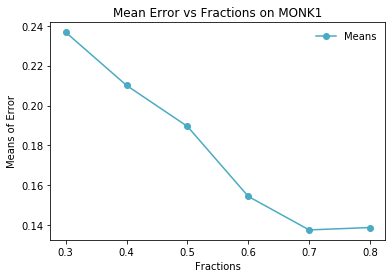

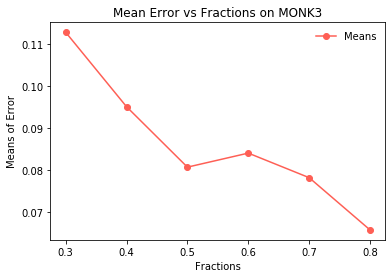

In [9]:
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

def prune_trees(data, test):
    pruned_tree = []
    fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]


    for j in fractions:
        train, validate = partition(data, j)
        train_tree = d.buildTree(train, m.attributes)
        train_forest = d.allPruned(train_tree)
        optimized_tree = d.check(train_tree, validate)

        best = train_tree

        for i in train_forest:
            temporary = d.check(i, validate)
            if optimized_tree < temporary:
                optimized_tree = temporary
                best_tree = i

        pruned_tree.append(1 - d.check(best, test))

    return pruned_tree


fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
monk1_pruned = []
monk3_pruned = []

# Try 50 times to prune a tree using different fraction each time
for i in range(50):
    monk1_pruned.append(prune_trees(m.monk1, m.monk1test))
    monk3_pruned.append(prune_trees(m.monk3, m.monk3test))

monk1_pruned = np.transpose(monk1_pruned)
monk3_pruned = np.transpose(monk3_pruned)

# Calculate the mean and standard deviation of all the pruned trees
mean1 = np.mean(monk1_pruned, axis=1)
mean3 = np.mean(monk3_pruned, axis=1)
std1 = np.std(monk1_pruned, axis=1)
std3 = np.std(monk3_pruned, axis=1)

# Create the statistics table of the average pruned tree for 1 and 3 dataset
statistics_table = PrettyTable(['Dataset/Stat', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6'])
statistics_table.add_row(np.concatenate((['MONK1 - mean'], np.around(mean1, decimals=5)), axis=0))
statistics_table.add_row(np.concatenate((['MONK3 - mean'], np.around(mean3, decimals=5)), axis=0))
statistics_table.add_row(np.concatenate((['MONK1 - stdev'], np.around(std1, decimals=5)), axis=0))
statistics_table.add_row(np.concatenate((['MONK3 - stdev'], np.around(std3, decimals=5)), axis=0))
print(statistics_table)

# Create the mean error table
prune_table = PrettyTable(['Dataset', 'Mean error on Builded Tree', 'Mean error on Pruned Tree'])
prune_table.add_row(['MONK1', 1 - d.check(buildedTree1, m.monk1test), np.amin(mean1)])
prune_table.add_row(['MONK3', 1 - d.check(buildedTree3, m.monk3test), np.amin(mean3)])
print(prune_table)

# Plot the means of 1 and 3 dataset wrt to fractions
plt.plot(fractions, mean1, color='#49abc2', marker='o', label="Means")
plt.title("Mean Error vs Fractions on MONK1")
plt.xlabel("Fractions")
plt.ylabel("Means of Error")
plt.legend(loc='upper right', frameon=False)
plt.show()

plt.plot(fractions, mean3, color='#fe5f55', marker='o', label="Means")
plt.title("Mean Error vs Fractions on MONK3")
plt.xlabel("Fractions")
plt.ylabel("Means of Error")
plt.legend(loc='upper right', frameon=False)
plt.show()        


Based on the graph, the minimum mean error for both cases, occurs for a partition with 0.8 fraction. Also, it is observed that a pruned tree has smaller mean error than the full tree, as expected. 